# Routh-Hurwitz Criterion

Consider a proper ($ n \leq m $) transfer function 

$$
G(s) = \frac{Y(s)}{U(s)} = \frac{b_{0} + b_{1} ~ s + b_{2} s^2 + \cdots + b_{n} ~ s^{n} }{a_{0} + a_{1} ~ s + a_{2} s^2 + \cdots + a_{m} ~ s^{m}}
$$

with coefficients $ a_{i}, b_{j} \in \mathbb{R} $ and $ i \in \left\{0,1,\cdots, m\right\}$, $ j \in \left\{0,1,\cdots, n\right\} $. The **poles** of the transfer function can be found by solving 

$$
a_{0} + a_{1} ~ s + a_{2} s^2 + \cdots + a_{m} ~ s^{m} = 0 \text{.}
$$

It is very difficult or impossible to find the poles algebraicly and thus the stability has to be proved using the Routh-Hurzwitz Criterion. 

## Scheme
The criterion has two steps: 
1. Check whether all coefficients of the denominator $a_{i}$ are greater than zero:
$$
a_{0} > 0 \\
a_{1} > 0 \\
\vdots \\
a_{m} > 0
$$
If one of the coefficients is **smaller than zero**, then the system is **unstable**!



2. Note the Hurwitz matrix $H_{m}$ and check whether the determinants of all principal minors $H_{i}$ are greater than zero.

The Hurwitz matrix can be noted as
$$
H_{m} =
\begin{pmatrix}
a_{1} & a_{3} & a_{5} & \cdots & a_{2m-1} \\
a_{0} & a_{2} & a_{4} & \cdots & a_{2m-2} \\
    0 & a_{1} & a_{3} & \cdots & a_{2m-3} \\
     & a_{0} & a_{2} & \ddots & \vdots \\
    \vdots & 0 & \vdots & \ddots &  \\
     & \vdots &  &  & \vdots \\
    0 & 0 & \cdots & & a_{m}     
\end{pmatrix}
\text{.}
$$

The coefficients $a_{m+1}, \cdots, a_{2m-1}$ are all equal to zero. 

The first principal minor is $ H_{1} = a_{1} $ and $ det( H_{1} ) = a_{1} > 0 $ has to hold. The second principal minor is 
$$
    H_{2} = 
\begin{pmatrix}
a_{1} & a_{3} \\
a_{0} & a_{2} \\
\end{pmatrix}
$$

and $ det( H_{2} ) = a_{1} ~ a_{2} - a_{0}~a_{3} > 0 $ has to be guaranteed. The third principal minor is 

$$
H_{3} = 
\begin{pmatrix}
a_{1} & a_{3} & a_{5} \\
a_{0} & a_{2} & a_{4} \\
    0 & a_{1} & a_{3}  
\end{pmatrix}
$$

and $ det( H_{3} ) = a_{1} ~ a_{2} ~ a_{3} + a_{0} ~ a_{1} ~ a_{5} - a_{0}~a_{3}^2 - a_{1}^2 ~ a_{4} > 0 $ has to hold. And so on for all further principal minors. 

If one of the determinants $ det(H_{i}) $ is **smaller than zero**, then the system is **unstable**!

## Examples: Unstable System

1. Consider a system with transfer function

$$
G_{1} = \frac{1}{5~s^3 + 2~s^2 - 2 ~s  + 3} \text{.}
$$

The poles are calculated by solving 

$$
a_{3} s^{3} + a_{2} ~s^2 + a_{1} ~s  + a_{0} = 5~s^3 + 2~s^2 - 2 ~s  + 3 = 0 \text{.}
$$

However, one has to know one root to calculate the other roots with polynomial long division - otherwise it is very hard. Therefore, the system is analyzed using the Routh-Hurwitz criterion.

This system is unstable because $ a_{1} = -2 < 0 $ and so the first condition does not hold: all $a_{i} > 0$.


2. Consider a system with transfer function (note the change of one sign)

$$
G_{2} = \frac{1}{5~s^3 + 2~s^2 + 2 ~s  + 3}
$$

Here, the first condition holds because: 
$$
a_{0} = 3 > 0 \qquad a_{1} = 2 > 0 \\
a_{2} = 2 > 0 \qquad a_{3} = 5 > 0 \\
$$

However, this system is still unstable because 

$$
det( H_{2} ) = a_{1} ~ a_{2} - a_{0}~a_{3} = 4 - 15 = -11 < 0 \text{.}
$$

So, the second condition does not hold here: $ det( H_{i} ) > 0 $.

### Simulation

System $G_{2}$ is simulated with simulation time $T = 20$ seconds and with the step function as input (step response).

In [4]:
using ControlSystems

Tf = 50; # Final simulation time
G2 = tf(1, [5, 2, 2, 3]) # Transfer function of system G2

TransferFunction{ControlSystems.SisoRational{Int64}}
           1
-----------------------
5*s^3 + 2*s^2 + 2*s + 3

Continuous-time transfer function model

In [2]:
pole(G2) # Poles of G2

3-element Array{Complex{Float64},1}:
 0.20702454556831654 + 0.8331849277669137im
 0.20702454556831654 - 0.8331849277669137im
 -0.8140490911366337 + 0.0im               

The real part of two poles are greater than zero. Therefore, the system is unstable.

**Remark:** The poles are computed numerically!

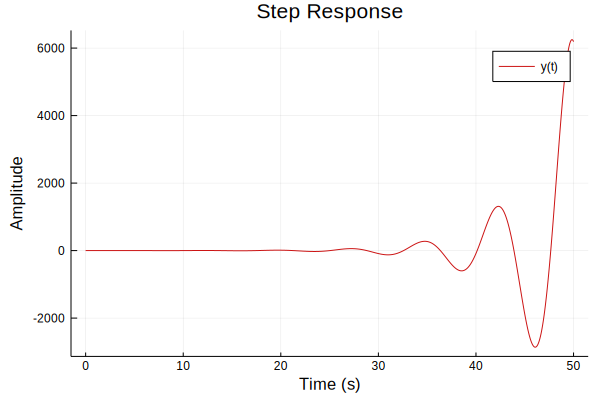

In [5]:
stepplot(G2, Tf, label="y(t)")

## Example: System with Parameter

Consider the transfer function of a system with parameter $K \in \mathbb{R}$ 

$$
    G_{p}(s) = \frac{1}{5~s^3 + 2~s^2 + 3~s  + 3+K} \text{.}
$$

1. All coefficients are greater than zero if $a_{0} = 3 + K > 0$.
Thus, $K > -3$ has to hold.
2. All principal minors have to be greater than zero: $ det( H_{i} ) > 0 $.

The determinants of both relevant principal minors are

$$
det( H_{2} ) =  a_{1} ~ a_{2} - a_{0}~a_{3} = 4 - 5~(K+3) = -11 - 5~K > 0
$$

and
$$
det( H_{3} ) =  a_{1} ~ a_{2} ~ a_{3} - a_{0}~a_{3}^2 = a_{3} ~ (a_{1} ~ a_{2} - a_{0}~a_{3}) \\
\qquad= 5~\left[4 - 5~(K+3)\right] = 5~\left[-11 - 5~K\right] > 0 \text{.}
$$

Hence, it has to be guaranteed that $ K < -\frac{11}{5} = - 2.2 $ holds. 

System $ G_{p}(s) $ is stable if both conditions $ K > -3 $ and $ K < 2.2 $ hold. Thus, the parameter has to be chosen in the interval $ K \in \left(-3.0, -2.2\right)$.

### Simulation

System $G_{p}$ is simulated with parameter $ K = -2.5 $ and the same simulation time as in the example above.

In [6]:
K = -2.5; # Parameter
Gp = tf(1, [5, 2, 2, (3+K)]) # Transfer function of system Gp

TransferFunction{ControlSystems.SisoRational{Float64}}
              1.0
-------------------------------
5.0*s^3 + 2.0*s^2 + 2.0*s + 0.5

Continuous-time transfer function model

In [7]:
pole(Gp)

3-element Array{Complex{Float64},1}:
  -0.0631729861865101 + 0.6011938868634268im
  -0.0631729861865101 - 0.6011938868634268im
 -0.27365402762697943 + 0.0im               

The real part of all poles are smaller than zero. Consequently, the system is stable.

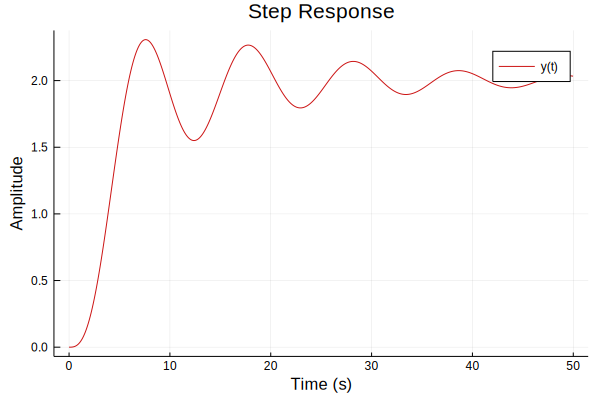

In [8]:
stepplot(Gp, Tf, label="y(t)")